### Get all the cities that have an airport and create airport_city_dict

In [1]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'airports.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
cities = set(data['City'])
print(len(cities))

# Create dictionary with IATA as key and City as value
airport_city_dict = data.set_index('IATA')['City'].to_dict()

# Display the dictionary
print(len(airport_city_dict.keys()))

6956
6073


### Get all the connections, and create a graph

In [3]:
# Replace 'your_file.csv' with the path to your CSV file
file_path = 'routes.csv'
routes = pd.read_csv(file_path)

# Filter rows where stops == 0
direct_flights = routes[routes['Stops'] == 0]

# just making sure that we are extracting the right data
source_airports_set = set(direct_flights['Source Airport'])
dest_airports_set = set(direct_flights['Destination Airport'])
airports_set = set(airport_city_dict.keys())
combined_airports = dest_airports_set.intersection(airports_set)
print(len(combined_airports))
print(combined_airports)

3255
{'VLD', 'LLK', 'HKD', 'LFR', 'AJI', 'XRY', 'DOH', 'HAS', 'TPA', 'LAN', 'GMO', 'BRA', 'KTN', 'TLV', 'PBZ', 'LFW', 'LMN', 'TBU', 'KKC', 'LCG', 'TET', 'JPA', 'MCZ', 'VUS', 'FRW', 'ALH', 'TGK', 'OMR', 'ZRJ', 'ZGS', 'LGP', 'ROT', 'CJU', 'PSG', 'WRO', 'VST', 'TOG', 'ADA', 'ZAG', 'WWK', 'KUV', 'TKJ', 'BMY', 'UVE', 'BRS', 'SCC', 'IDA', 'SRQ', 'SRY', 'BWK', 'ALB', 'YTH', 'IXB', 'TRG', 'YSO', 'VAN', 'PQM', 'JIC', 'PAP', 'IAR', 'OIT', 'MGH', 'RZR', 'RAS', 'LEN', 'CMP', 'BAV', 'TMR', 'GYE', 'MSS', 'NBE', 'OHE', 'LSP', 'BVS', 'JNZ', 'NOV', 'KYA', 'ERM', 'WRE', 'BPL', 'MUE', 'KSY', 'ZUH', 'SXR', 'PHC', 'YPH', 'NNB', 'PBI', 'TFN', 'RMQ', 'XTG', 'MKG', 'YVR', 'BHI', 'MKK', 'ROS', 'SLA', 'HPN', 'BAH', 'YPO', 'PKN', 'AEX', 'AOE', 'YCO', 'CEI', 'MAQ', 'ETH', 'TVC', 'ABT', 'GIZ', 'SMK', 'KKJ', 'BOS', 'KZI', 'EVG', 'LCH', 'BDS', 'TXK', 'CFB', 'EUX', 'UDJ', 'ZIG', 'YQU', 'GXH', 'INL', 'DOK', 'RVN', 'BXR', 'PNH', 'DAV', 'ABY', 'GYS', 'UIO', 'SHG', 'DJG', 'SLW', 'VEE', 'RJK', 'KBL', 'JNB', 'PMC', 'IBR', 

In [ ]:
# # create a graph with attributes such as airline id and airline
# import networkx as nx

# G = nx.DiGraph()

# for index, row in direct_flights.iterrows():
#    # get airport code
#    source_airport = row['Source Airport']
#    destination_airport = row['Destination Airport']
#    airline = row['Airline']
#    airline_id = row['Airline ID']

#    # Check if the airport codes exist in the dictionary
#    if source_airport in airport_city_dict and destination_airport in airport_city_dict:
#       # Get city names based on airport codes
#       source_city = airport_city_dict[source_airport]
#       destination_city = airport_city_dict[destination_airport]

#       # Add an edge from Source City to Destination City with airline as an attribute
#       G.add_edge(source_city, destination_city, Airline=airline, Airline_ID=airline_id)
      
# print(len(G.nodes()))
# print(len(G.edges()))

3136
34614


In [5]:
# create a graph with attributes such as airline id and airline
import networkx as nx

G = nx.DiGraph()

for index, row in direct_flights.iterrows():
   # get airport code
   source_airport = row['Source Airport']
   destination_airport = row['Destination Airport']
   airline = row['Airline']
   airline_id = row['Airline ID']

   # Check if the airport codes exist in the dictionary
   if source_airport in airport_city_dict and destination_airport in airport_city_dict:
      # Get city names based on airport codes
      source_city = airport_city_dict[source_airport]
      destination_city = airport_city_dict[destination_airport]

       # Check if the edge already exists
      if G.has_edge(source_city, destination_city):
         # Increment the weight attribute
         G[source_city][destination_city]['weight'] += 1
      else:
         # Add a new edge with weight = 1 and other attributes
         G.add_edge(source_city, destination_city, weight=1, Airline=airline, Airline_ID=airline_id)
      
print(len(G.nodes()))
print(len(G.edges()))

3136
34614


Edge Weight Distribution:
Weight 1: 18667 edges
Weight 2: 8526 edges
Weight 6: 470 edges
Weight 5: 882 edges
Weight 3: 3691 edges
Weight 4: 1665 edges
Weight 7: 267 edges
Weight 8: 171 edges
Weight 9: 94 edges
Weight 11: 30 edges
Weight 14: 13 edges
Weight 12: 37 edges
Weight 10: 65 edges
Weight 13: 13 edges
Weight 25: 1 edges
Weight 15: 10 edges
Weight 17: 6 edges
Weight 24: 1 edges
Weight 16: 4 edges
Weight 18: 1 edges


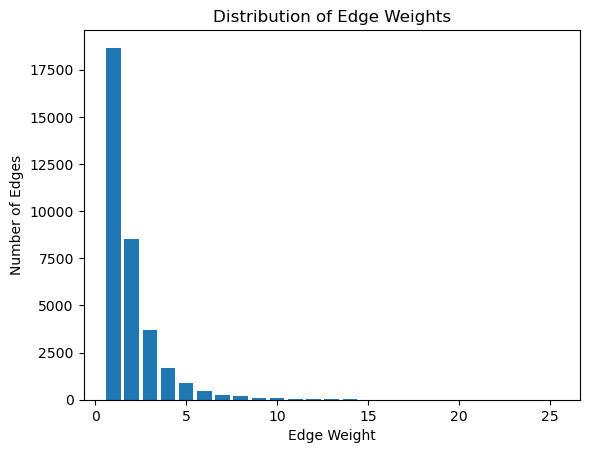

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract edge weights from the graph
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]

# Count occurrences of each weight
weight_distribution = Counter(edge_weights)

# Print the distribution
print("Edge Weight Distribution:")
for weight, count in weight_distribution.items():
    print(f"Weight {weight}: {count} edges")

# Visualize the distribution
plt.bar(weight_distribution.keys(), weight_distribution.values())
plt.xlabel('Edge Weight')
plt.ylabel('Number of Edges')
plt.title('Distribution of Edge Weights')
plt.show()


### Saving and loading to pickle to make sure that is is ok

In [ ]:
# save to pickle
import pickle

# Save the graph to a file using pickle
with open('flight_network_graph.pickle', 'wb') as f:
   pickle.dump(G, f)

In [ ]:
# Load the graph from the pickle file
with open('flight_network_graph.pickle', 'rb') as f:
   G_loaded = pickle.load(f)
print(len(G_loaded.edges()))

34614


### Scrape the info on cities

In [ ]:
print(G.nodes())

['Sochi', 'Kazan', 'Astrakhan', 'Mineralnye Vody', 'Chelyabinsk', 'Novosibirsk', 'Moscow', 'Nizhnekamsk', 'Taganrog', 'Bugulma', 'Belgorod', 'Kaliningrad', 'Baku', 'St. Petersburg', 'Yekaterinburg', 'Nizhnevartovsk', 'Novy Urengoy', 'Bratsk', 'Irkutsk', 'Chita', 'Kirensk', 'Bodaibo', 'Ust-Kut', 'Lensk', 'Yakutsk', 'Mirnyj', 'Ayacucho', 'Lima', 'Cuzco', 'Puerto Maldonado', 'Huánuco', 'Iquitos', 'Pucallpa', 'Tarapoto', 'Abidjan', 'Bobo-dioulasso', 'Ouagadougou', 'Accra', 'Bamako', 'Dakar', 'Cotonou', 'Lome', 'Niamey', 'Bogota', 'Guayaquil', 'Quito', 'Cali', 'San Cristóbal', 'Coca', 'Brindisi', 'Zurich', 'Bordeaux', 'Bristol', 'Geneva', 'Gran Canaria', 'Larnaca', 'Marsa Alam', 'Tenerife', 'Arvidsjaur', 'Lycksele', 'Stockholm', 'Gallivare', 'Halmstad', 'Joenkoeping', 'Kramfors', 'Karlstad', 'Mariehamn', 'Ornskoldsvik', 'Pori', 'Sandefjord', 'Visby', 'Vilhelmina', 'Vaxjo', 'Hemavan', 'Kruunupyy', 'Turku', 'Oslo', 'Kodiak', 'Larsen Bay', 'Karluk', 'Basco', 'Manila', 'Butuan', 'Cotabato', 'Ca

In [38]:
import urllib
import json
import re


def get_wikivoyage_page(name):

   baseurl = "https://en.wikipedia.org/w/api.php?"
   action = "action=query"
   urltitle = f"titles={name}"
   content = "prop=revisions&rvprop=content&rvslots=main"
   dataformat ="format=json"

   query = f"{baseurl}{action}&{urltitle}&{content}&{dataformat}"

   wikiresponse = urllib.request.urlopen(query)
   wikidata = wikiresponse.read()
   wikitext = wikidata.decode('utf-8')
   data = json.loads(wikitext)
   return data

def get_wikitext_content(data):
   if isinstance(data, dict):
      for key, value in data.items():
         if key == '*':
               return value
         result = get_wikitext_content(value)
         if result:
               return result
   elif isinstance(data, list):
      for item in data:
         result = get_wikitext_content(item)
         if result:
               return result
   return None

def clean_city_name (city_name):
  cleaned_name = str(city_name).replace(" ", "_")
  cleaned_name = urllib.parse.quote(cleaned_name)
  return cleaned_name

def get_content(name):
  city = clean_city_name(name)
  data = get_wikivoyage_page(city)
  content = get_wikitext_content(data)
  return content

def redirect (content):
  """
  This funciton redirect to the right page in case there is a need
  """
  if content is not None and "#REDIRECT" in content.upper():
    # get the redirect link
    matches = re.findall(r'\[\[(.*?)\]\]', content)
    redirect_name = matches[0]
    content = get_content(redirect_name)

  return content

def may_refer_to_city(content):
  """
  In case there are more pages with the same name
  """
  if content is not None and len(content) < 6000 and ("may refer to" in content.lower() or "refers to" in content.lower()):
    matches = re.findall(r'\[\[(.*?)\]\](?=.*\b(capital|city|town)\b)', content)
    if len(matches) > 0:
      name = matches[0]
      content = get_content(name)
      content = redirect(content)
  return content

### Populate the context of the city in the graph

In [40]:
from tqdm import tqdm  # Import tqdm
import re
import os

nodes_to_remove = []

output_dir = "./new_cities"
os.makedirs(output_dir, exist_ok=True)  # Ensure the directory exists

# Iterate through the nodes with a progress bar
for node in tqdm(G.nodes(), desc="Processing nodes", unit="node"):

    try:
        file_name = node + ".txt"
        output_file = os.path.join(output_dir, file_name)
        # Try to fetch the Wikivoyage page and get the content
        content = get_content(node)

        # chech for redirect
        content = redirect(content)

        # chech to mey refer to
        content = may_refer_to_city(content)

        # if content is not None and len(content) < 6000:
        #   # in case there are multiple pages with the same name we take the first city/town name
        #   if content is not None and ("may refer to" in content.lower() or "refers to" in content.lower()):
        #     if "capital" in content.lower():
        #         # find the city it refers to by looking at the link that is right before the name city
        #         matches = re.findall(r'\[\[(.*?)\]\](?=.*capital)', content)
        #         last_match_before_city = matches[0] if matches else None
        #         if last_match_before_city is not None:
        #             city = clean_city_name(last_match_before_city)
        #             data = get_wikivoyage_page(city)
        #             content = get_wikitext_content(data)
        #             if content is not None:
        #                 start_end_dict[node] = last_match_before_city
        #     elif "city" in content.lower():
        #         # find the city it refers to by looking at the link that is right before the name city
        #         matches = re.findall(r'\[\[(.*?)\]\](?=.*city)', content)
        #         last_match_before_city = matches[0] if matches else None
        #         if last_match_before_city is not None:
        #             city = clean_city_name(last_match_before_city)
        #             data = get_wikivoyage_page(city)
        #             content = get_wikitext_content(data)
        #             if content is not None:
        #                 start_end_dict[node] = last_match_before_city
        #     # do the same for the town
        #     elif "town" in content.lower():
        #         # find the city it refers to by looking at the link that is right before the name city
        #         matches = re.findall(r'\[\[(.*?)\]\](?=.*town)', content)
        #         last_match_before_city = matches[0] if matches else None
        #         if last_match_before_city is not None:
        #             city = clean_city_name(last_match_before_city)
        #             data = get_wikivoyage_page(city)
        #             content = get_wikitext_content(data)
        #             if content is not None:
        #                 start_end_dict[node] = last_match_before_city

        #     # chech for redirect
        #     content = redirect(content)

        if content is None or len(content) < 6000:
          nodes_to_remove.append(node)
        else:
            G.nodes[node]['Content'] = content
            with open(output_file, 'w', encoding='utf-8') as file:
                file.write(content)

    except Exception as e:
        nodes_to_remove.append(node)
        # If an error occurs, print the error message and the node
        print(f"Failed to get content for node {node}: {e}")
        continue  # Continue to the next node if there's an error


Processing nodes:  90%|████████▉ | 2820/3136 [10:47<01:17,  4.05node/s]

Failed to get content for node nan: unsupported operand type(s) for +: 'float' and 'str'


Processing nodes: 100%|██████████| 3136/3136 [11:55<00:00,  4.39node/s]


In [41]:
print(len(G.nodes))
print(len(nodes_to_remove))

3136
884


In [42]:
G.remove_nodes_from(nodes_to_remove)

In [50]:
G_undirected = G.to_undirected()
print("Number of nodes: ", len(G.nodes()))
print("Number of edges:", len(G.edges()))
print("Number of edges of undirected graph: ", len(G_undirected.edges()))

Number of nodes:  2252
Number of edges: 26808
Number of edges of undirected graph:  13650


In [45]:
# save to pickle
import pickle

# Save the graph to a file using pickle
with open('flight_with_content_pretty_good.pickle', 'wb') as f:
   pickle.dump(G, f)
